In [1]:
# Do not edit this cell

# course: 3654
# a: Homework 7
# d: VT

# Homework 7

**Enter your Name:**  Phillip McDonough
    
**Enter your PID:**  906263051
    
I have neither given nor received unauthorized assistance on this assignment. See the course sylabus for details on the Honor Code policy. In particular, sharing lines of solution code is prohibited.

In [7]:
# Run this cell first.  Do NOT edit this cell.
Answer1 = Answer2 = Answer3 = Answer4 = Answer5 = None
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.cluster as cl
import sklearn.manifold as mani
#%matplotlib inline
states = pd.read_csv('State_demographics.csv') 
survey = pd.read_csv('CS3654-FA21-survey-clean.csv')
states.shape, survey.shape

((51, 52), (106, 25))

**Problem 1. (20 points)**  What are 5 clusters in the States data?  Extract and z-score normalize the quantitative columns of the State-demographics data.  Then, compute k=5 clusters of states using the k-means algorithm.

For grading purposes, eliminate the randomness of the initial step of k-means by initializing the 5 centroids using these data points in this order: 'CA','DC','LA','MT','NH' (hint: 'init' parameter of KMeans, and n_init=1).  Use the default values for other unspecified parameters.

In Answer1, return a DataFrame containing only 'State' column and 'Cluster' label column, sorted by increasing Cluster label (number).

In [10]:
# Problem 1
# Insert your work here
quant_states = states.iloc[:, 2:]
quant_states.index = states.State

zDF = (quant_states - quant_states.mean()) / quant_states.std()
centroids = zDF.loc[["California","District Of Columbia","Louisiana","Montana","New Hampshire"]]

km = cl.KMeans(n_clusters=5, init=centroids, n_init=1)
labels = km.fit_predict(zDF)
zDF["Cluster"] = labels

Answer1 = pd.DataFrame(zDF.Cluster, zDF.index).sort_values(by="Cluster").reset_index()
Answer1

help(cl.KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

**Problem 2. (20 points)** How can the data be reduced to 2 dimensions?  Use MDS with L2 Euclidean distance to reduce the dimensionality of the same z-scored quantitative columns to 2 dimensions (hint: MDS can compute L2 distances for you if you use 'euclidean' dissimilarity instead of 'precomputed').

For grading purposes, eliminate the randomness of the initial step of MDS by initializing the 2 reduced dimensions with the data in columns: 
"Education.Bachelor's Degree or Higher", "Income.Per Capita Income"
(hint: use the 'init' parameter of MDS.fit_transform). Set n_init=1, eps=0 and max_iter=1000. Use the default values for  other unspecified parameters.

In Answer2, return a DataFrame containing the 'State' column and the new 'X' and 'Y' columns, sorted by increasing 'Y'.

In [4]:
# Problem 2
# Insert your work here
cols = zDF.loc[:,["Education.Bachelor's Degree or Higher","Income.Per Capita Income"]]
zHD = zDF.iloc[:, :-1]

mds = mani.MDS(max_iter=1000, n_init=1, eps=0, dissimilarity="euclidean")
Answer2 = mds.fit_transform(zHD, init=cols)
Answer2 = pd.DataFrame(Answer2, index=zHD.index, columns=["X","Y"]).sort_values(by="Y").reset_index()
Answer2

,State,X,Y
0,New Mexico,-0.285137,-9.159046
1,Mississippi,0.236394,-6.536576
2,Texas,12.722746,-6.212489
3,West Virginia,-3.232024,-5.767393
4,Utah,-7.130742,-5.073875
5,Louisiana,0.986791,-4.484911
6,Oklahoma,-3.684575,-4.263667
7,Arkansas,-1.906322,-4.072289
8,Alabama,0.150749,-3.991878
9,Arizona,2.370230,-3.578496


**Problem 3. (20 points)** How would you describe the categorization of the states?   For this question, put the previous two answers together in a visualization.  Draw a scatterplot of the MDS result, and color the dots by their cluster memberships.  Label each dot with its state abbreviation (Hint: axes.text( )).  

Compute the 2D cluster centroids of the 2-dimensional X,Y data from MDS, and plot the centroids in the same plot, using the same color scheme, but make the centroids dots much larger than the state dots and give them transparency (alpha).

Display the plot, but Answer3 only needs to store the 2D centroids as a DataFrame with columns 'X','Y', indexed and sorted by cluster label. 

*Think about:* Do the clusters overlap? Are the points always nearest to their own centroid? Why might the clusters not necessarily look strictly clustered in the MDS plot?  Hint: think high-dimensionally.

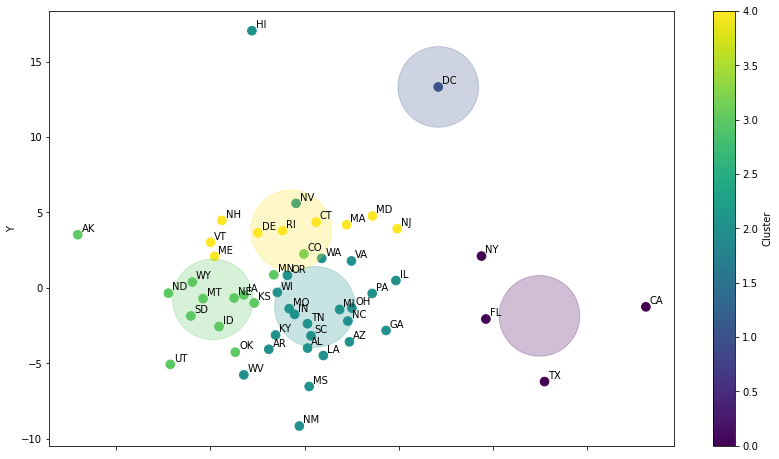

In [5]:
# Problem 3
# Insert your work here

combinedDF = pd.merge(Answer1, Answer2, on=["State"]).sort_values(by="State")
combinedDF.index = states.Abbrev

ax = combinedDF.plot.scatter(x="X", y="Y", c="Cluster",  s=75, cmap="viridis", figsize=(14,8))
for i in range(len(Answer2)):
    ax.text(combinedDF.X[i]+0.2, combinedDF.Y[i]+0.2, combinedDF.index[i])  

Answer3 = combinedDF.groupby("Cluster").mean()

ax.scatter(Answer3.X, Answer3.Y, s=6500, alpha=0.25, c=Answer3.index, cmap="viridis")

**Problem 4. (20 points)** Is there a natural number of clusters for the States data?  Conduct an "elbow" analysis by re-running k-means with all possible values of k. Display a line plot, with circle markers, of 'total within-cluster variance' (kmeans.inertia_) as a function of k.  To get good results, you will want to use the default init='k-means++' parameter. For reasonable running times, use n_init=3 and max_iter=20.

Display the plot, but Answer4 only needs to store the results as a DataFrame with columns 'K' and 'Inertia', sorted by increasing K. 

<AxesSubplot:xlabel='K'>

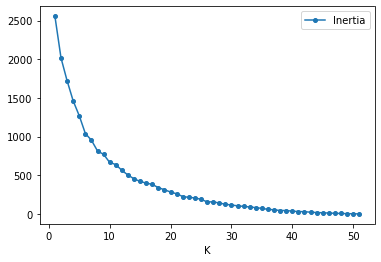

In [6]:
# Problem 4
# Insert your work here
data = []

for i in range(1,len(zDF)+1):
    km = cl.KMeans(n_clusters=i, n_init=3, max_iter=20)
    labels = km.fit_predict(zDF)
    data.append((i, km.inertia_))
    
Answer4 = pd.DataFrame(data, columns=["K","Inertia"]).sort_values(by="K")
Answer4.plot.line(x="K", y="Inertia", marker="o", markersize=4)

**Problem 5. (20 points)**  Complete the following sentence: "There are two kinds of people in the world (well, in our class anyway), ..."  How would you describe those two kinds of people? There are two kinds of people in this class, people who use mac and people who use pc.

Using the Survey data, z-score normalize the quantitative dimensions, use k-means to find 2 clusters, and then visualize the centroids of these clusters using Parallel Coordinates to find the answer.  

Hint:  Use clustering, and find out what is most different about their centroids.  Rerun your analysis several times to see what columns are most consistently most different.  Since this data is more complex, use n_init=100, max_iter=100.  Visually justify your claim by displaying a Parallel Coordinates plot of the z-score centroids.

In Answer5, return a Series, indexed by the quantitative column names, containing the absolute-value difference between the z-score centroids, sorted in decreasing magnitude.

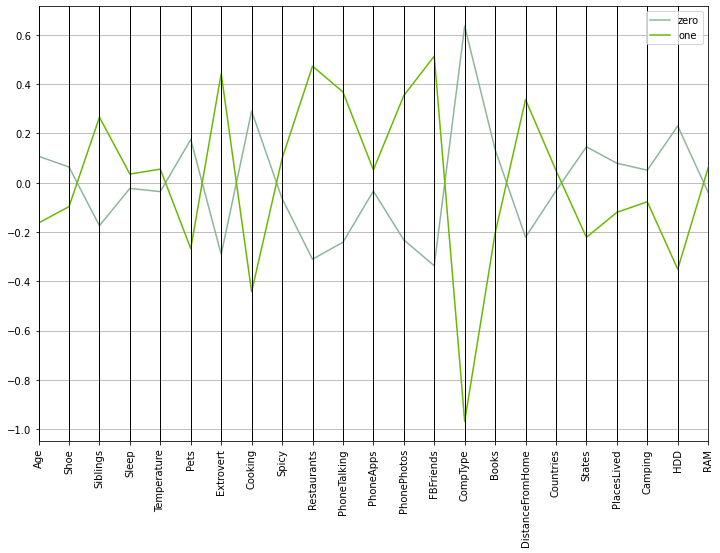

In [7]:
# Problem 5
# Insert your work here

quant_survey = survey.iloc[:, 2:]
quant_survey.index = survey.Name

norm = (quant_survey - quant_survey.mean()) / quant_survey.std()
km = cl.KMeans(n_clusters=2, n_init=100, max_iter=100)
labels = km.fit_predict(norm)
norm["Cluster"] = labels

cluster_points = norm.groupby("Cluster").mean().transpose()
cluster_points.columns = ["zero", "one"]
Answer5 = (cluster_points.zero - cluster_points.one).abs().sort_values(ascending=False)

cluster_points = cluster_points.transpose()
cluster_points["Clusters"] = cluster_points.index

plot1 = pd.plotting.parallel_coordinates(cluster_points, "Clusters")
plot1.set_xticklabels(cluster_points.loc[:, cluster_points.columns != "Clusters"], rotation=90) 
plot1.figure.set_size_inches(12,8)

In [14]:
# scratch space



x = [i for i in range(10)]

for val in x:
    if val == 3:
        x.remove(val)
        
x

help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.

